# Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import cross_val_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Collection and Dataset Formation

In [ ]:
# loading the dataset to a pandas DataFrame
fake_dataset=pd.read_csv('Fake.csv')
true_dataset=pd.read_csv('True.csv')
news_article=pd.read_csv('news_articles.csv')


In [ ]:
fake_dataset.shape

(23481, 4)

In [ ]:
fake_dataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake_dt=fake_dataset.drop(['subject','date'],axis=1)
fake_dt['content']=fake_dt['title']+fake_dt['text']
fake_dt.insert(3, 'label', 'Fake')
fake_dt

,title,text,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...,Fake
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,McPain: John McCain Furious That Iran Treated ...,Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,How to Blow $700 Million: Al Jazeera America F...,Fake


In [ ]:
true_dataset.shape

(21417, 4)

In [ ]:
true_dataset.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true_dt=true_dataset.drop(['subject','date'],axis=1)
true_dt['content']=true_dt['title']+true_dt['text']
true_dt.insert(3, 'label', 'Real')
true_dt

,title,text,content,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"As U.S. budget fight looms, Republicans flip t...",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,U.S. military to accept transgender recruits o...,Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Senior U.S. Republican senator: 'Let Mr. Muell...,Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,FBI Russia probe helped by Australian diplomat...,Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Trump wants Postal Service to charge 'much mor...,Real
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,'Fully committed' NATO backs new U.S. approach...,Real
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",LexisNexis withdrew two products from Chinese ...,Real
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,Minsk cultural hub becomes haven from authorit...,Real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,Vatican upbeat on possibility of Pope Francis ...,Real


In [ ]:
news_art=news_article.drop([2095])
news_art=news_art.drop(['author','published','site_url','main_img_url','type','title_without_stopwords','text_without_stopwords','hasImage','language'],axis=1)
news_art.isnull().sum()


title     0
text     45
label     0
dtype: int64

In [ ]:
news_art = news_art.fillna('')
news_art.isnull().sum()


title    0
text     0
label    0
dtype: int64

In [ ]:
news_art['content']=news_art['title']+news_art['text']
news_art

,title,text,label,content
0,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,Real,muslims busted they stole millions in govt ben...
1,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,Real,re why did attorney general loretta lynch plea...
2,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,Real,breaking weiner cooperating with fbi on hillar...
3,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,Real,pin drop speech by father of daughter kidnappe...
4,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,Real,fantastic trumps point plan to reform healthc...
...,...,...,...,...
2090,prof canoes reek of genocide white privilege,,Real,prof canoes reek of genocide white privilege
2091,teens walk free after gangrape conviction,,Real,teens walk free after gangrape conviction
2092,school named for munichmassacre mastermind,,Real,school named for munichmassacre mastermind
2093,russia unveils satan missile,,Fake,russia unveils satan missile


In [ ]:
news_dataset=pd.concat([true_dt,fake_dt,news_art]).reset_index(drop=True)
# news_dataset=pd.read_csv('news_dataset.csv')
news_dataset

,title,text,content,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"As U.S. budget fight looms, Republicans flip t...",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,U.S. military to accept transgender recruits o...,Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Senior U.S. Republican senator: 'Let Mr. Muell...,Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,FBI Russia probe helped by Australian diplomat...,Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Trump wants Postal Service to charge 'much mor...,Real
...,...,...,...,...
46988,prof canoes reek of genocide white privilege,,prof canoes reek of genocide white privilege,Real
46989,teens walk free after gangrape conviction,,teens walk free after gangrape conviction,Real
46990,school named for munichmassacre mastermind,,school named for munichmassacre mastermind,Real
46991,russia unveils satan missile,,russia unveils satan missile,Fake


In [ ]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

# Data Preprocessing

In [ ]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

title      0
text       0
content    0
label      0
dtype: int64

In [ ]:
news_dataset["label"].replace("Fake", 1, inplace = True)
news_dataset["label"].replace("Real", 0, inplace = True)

In [ ]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46993 entries, 0 to 46992
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    46993 non-null  object
 1   text     46993 non-null  object
 2   content  46993 non-null  object
 3   label    46993 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
Y.head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: label, Length: 100, dtype: int64

# Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        u budget fight loom republican flip fiscal scr...
1        u militari accept transgend recruit monday pen...
2        senior u republican senat let mr mueller job w...
3        fbi russia probe help australian diplomat tip ...
4        trump want postal servic charg much amazon shi...
                               ...                        
46988                prof cano reek genocid white privileg
46989                       teen walk free gangrap convict
46990                 school name munichmassacr mastermind
46991                           russia unveil satan missil
46992                         check hillarythem haunt hous
Name: content, Length: 46993, dtype: object


In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
Y.shape

(46993,)

TfidfVectorizer and CountVectorizer are two popular tools for converting text data into numerical feature vectors that can be used in machine learning models. Both of these vectorizers are part of the sklearn.feature_extraction.text module in the scikit-learn library.

Here's a brief comparison of TfidfVectorizer and CountVectorizer:

TfidfVectorizer stands for Term Frequency-Inverse Document Frequency Vectorizer. It converts a collection of text documents into a matrix of numerical features, where each column represents a unique word (also called a "token") and each row represents a document. The values in the matrix represent the importance of each token in a document, which is calculated using the tf-idf weighting scheme. This weighting scheme takes into account the frequency of each token in a document (term frequency) and the rarity of each token in the collection of documents (inverse document frequency). The goal of tf-idf is to give more weight to rare and important words and less weight to common and unimportant words.

CountVectorizer converts a collection of text documents into a matrix of numerical features, where each column represents a unique word (also called a "token") and each row represents a document. The values in the matrix represent the frequency of each token in a document. This vectorizer does not take into account the rarity of the words in the collection of documents, so all words are given equal weight.

In summary, TfidfVectorizer is a more sophisticated vectorizer that takes into account the importance of each word in a document, while CountVectorizer simply counts the frequency of each word in a document. TfidfVectorizer is generally preferred over CountVectorizer when working with text data, as it can help identify the most important words in a document and reduce the impact of common, unimportant words. However, CountVectorizer can be useful in certain situations, such as when you want to simply count the number of occurrences of each word in a document.

In [ ]:
# converting the textual data to numerical data

vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 121797)	0.030682718293413756
  (0, 121392)	0.025598616325943662
  (0, 121168)	0.04425812128989064
  (0, 119727)	0.04065667123356976
  (0, 119530)	0.01858102232254902
  (0, 118547)	0.034420721411125184
  (0, 118515)	0.059743334033743135
  (0, 118184)	0.01950424550658777
  (0, 117766)	0.026338928656276267
  (0, 117650)	0.020587121621316505
  (0, 117645)	0.044477557052247256
  (0, 117445)	0.035283407478253426
  (0, 117407)	0.04549610163235835
  (0, 117102)	0.01964274729440981
  (0, 116887)	0.022488205484877295
  (0, 116654)	0.073371597805808
  (0, 116520)	0.060315362471341644
  (0, 115851)	0.08433620984972551
  (0, 113519)	0.018487684060967877
  (0, 113392)	0.030163033217351063
  (0, 112558)	0.01821460282165804
  (0, 110905)	0.022760839416915223
  (0, 109762)	0.09521359021298553
  (0, 109474)	0.12463571719220536
  (0, 109354)	0.04112385373476003
  :	:
  (46987, 16933)	0.3130371710792546
  (46987, 14409)	0.6127005839743297
  (46988, 118184)	0.1458812041647746
  (46988, 88202)	0.48698

# Data Exploration

In [ ]:
news_dataset.describe(include='all')

,title,text,content,label
count,46993,46993,46993,46993.000000
unique,40512,40588,40864,NaN
top,no title,,highlight trump presid april p edt gmt friday ...,NaN
freq,186,627,8,NaN
mean,NaN,NaN,NaN,0.527206
std,NaN,NaN,NaN,0.499265
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,1.000000


In [ ]:
fig = px.pie(news_dataset,names='label',title='Proportion of Real vs. Fake News',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

# Model Building and evaluation

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)
print(X_test)

  (0, 122855)	0.14441049386260585
  (0, 122853)	0.11411475867365374
  (0, 121744)	0.2849003716953989
  (0, 121533)	0.06659344664018747
  (0, 121392)	0.021264385283011753
  (0, 121168)	0.03676455520202053
  (0, 119727)	0.02251525656510259
  (0, 119405)	0.028094616236172834
  (0, 118688)	0.027753098216953487
  (0, 117287)	0.05193402007318498
  (0, 117102)	0.03263386904719892
  (0, 116654)	0.015237170485184087
  (0, 116502)	0.028021435261892016
  (0, 115122)	0.04547625856082246
  (0, 114998)	0.016066733946570252
  (0, 114853)	0.01587490788588926
  (0, 114214)	0.03466845474783491
  (0, 113443)	0.017251853505895226
  (0, 112558)	0.015130596405877864
  (0, 112388)	0.031106800587397048
  (0, 109724)	0.025763709359074446
  (0, 109226)	0.03115648150863084
  (0, 108722)	0.023477000515407454
  (0, 107062)	0.09167690572209833
  (0, 106692)	0.03389080056811767
  :	:
  (14097, 78034)	0.22931783159690663
  (14097, 78031)	0.21576154436807804
  (14097, 77028)	0.1786994353419645
  (14097, 73698)	0.08065

# Logistic Regression

In [ ]:
# List for storing accuracy score of the models
scores=[]

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
scores.append(model_lr.score(X_test,Y_test))

Text(69.0, 0.5, 'Truth')

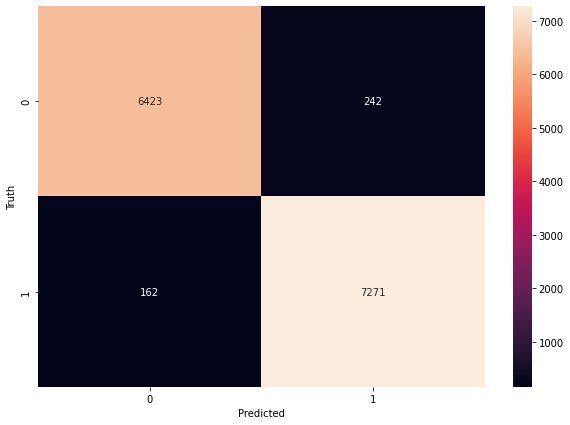

In [ ]:
from sklearn import metrics
Y_pred=model_lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cnf_matrix, annot=True,fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6665
           1       0.97      0.98      0.97      7433

    accuracy                           0.97     14098
   macro avg       0.97      0.97      0.97     14098
weighted avg       0.97      0.97      0.97     14098



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(X_test)

In [ ]:
scores.append(DT.score(X_test, Y_test))

In [ ]:
print(classification_report(Y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      6665
           1       0.98      0.98      0.98      7433

    accuracy                           0.98     14098
   macro avg       0.98      0.98      0.98     14098
weighted avg       0.98      0.98      0.98     14098



Text(69.0, 0.5, 'Truth')

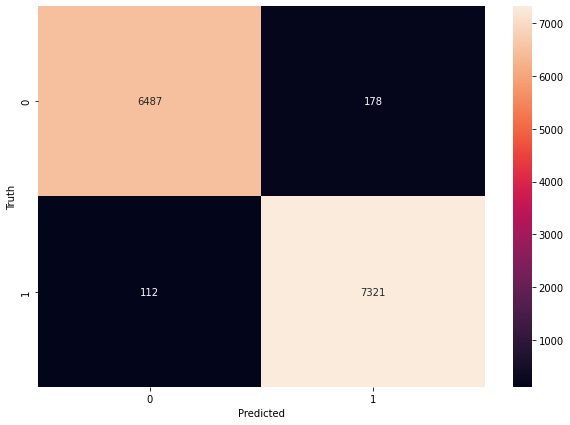

In [ ]:
#from sklearn.metrics import confusion_matrics
cm = metrics.confusion_matrix(Y_test, pred_dt)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Naive Bayes

In [ ]:
# The Complement Naive Bayes outperforms both Gaussian Naive Bayes and Multinomial Naive Bayes in text classification
from sklearn.naive_bayes import ComplementNB
model_NB = ComplementNB().fit(X_train,Y_train)
pred_NB=model_NB.predict(X_test)
model_NB.score(X_test,Y_test)
scores.append(model_NB.score(X_test,Y_test))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      6665
           1       0.91      0.94      0.93      7433

    accuracy                           0.92     14098
   macro avg       0.92      0.92      0.92     14098
weighted avg       0.92      0.92      0.92     14098



Text(69.0, 0.5, 'Truth')

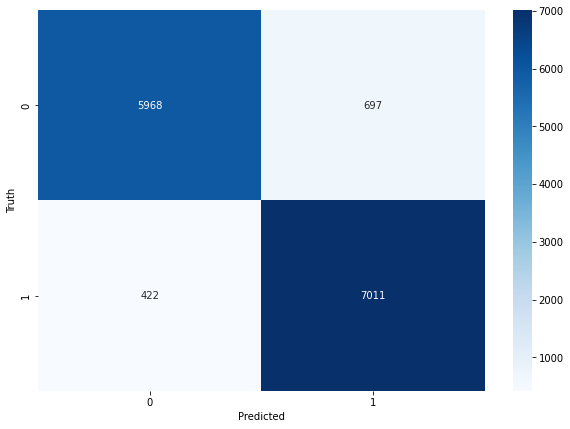

In [ ]:
#from sklearn.metrics import confusion_matrics
cm = metrics.confusion_matrix(Y_test, pred_NB)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, Y_train)
scores.append(model_svc.score(X_test,Y_test))

Text(69.0, 0.5, 'Truth')

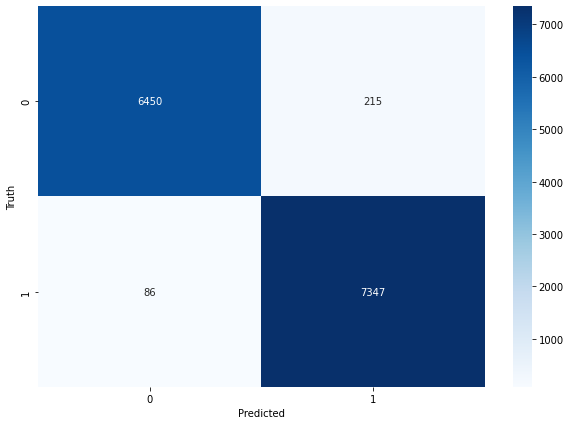

In [ ]:
#from sklearn.metrics import confusion_matrics
pred_svm=model_svc.predict(X_test)
cm = metrics.confusion_matrix(Y_test, pred_svm)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6665
           1       0.97      0.99      0.98      7433

    accuracy                           0.98     14098
   macro avg       0.98      0.98      0.98     14098
weighted avg       0.98      0.98      0.98     14098



#Random Forrest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100)
model_rfc.fit(X_train, Y_train)
scores.append(model_rfc.score(X_test,Y_test))
model_rfc.score(X_test,Y_test)

0.9743935309973046

Text(69.0, 0.5, 'Truth')

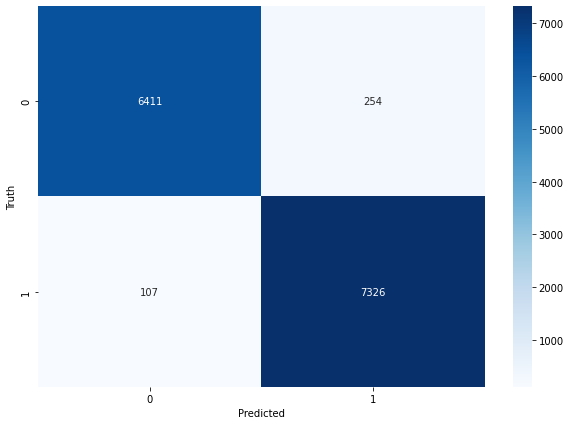

In [ ]:
#from sklearn.metrics import confusion_matrics
pred_rfc=model_rfc.predict(X_test)
cm = metrics.confusion_matrix(Y_test, pred_rfc)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6665
           1       0.97      0.99      0.98      7433

    accuracy                           0.97     14098
   macro avg       0.98      0.97      0.97     14098
weighted avg       0.97      0.97      0.97     14098



# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, Y_train)
scores.append(model_knn.score(X_test,Y_test))


Text(69.0, 0.5, 'Truth')

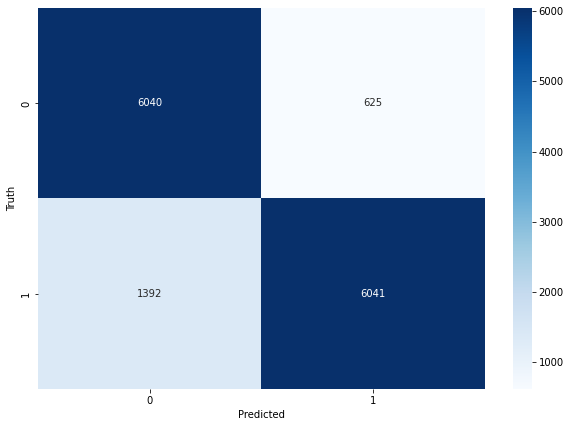

In [ ]:
#from sklearn.metrics import confusion_matrics
pred_knn=model_knn.predict(X_test)
cm = metrics.confusion_matrix(Y_test, pred_knn)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      6665
           1       0.91      0.81      0.86      7433

    accuracy                           0.86     14098
   macro avg       0.86      0.86      0.86     14098
weighted avg       0.86      0.86      0.86     14098



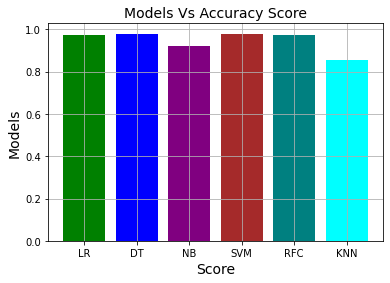

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {'model': ['LR', 'DT', 'NB', 'SVM', 'RFC','KNN'],
        'scores': scores
       }
df = pd.DataFrame(data)

colors = ['green','blue','purple','brown','teal', 'cyan']
plt.bar(df['model'], df['scores'], color=colors)
plt.title('Models Vs Accuracy Score', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.grid(True)
plt.show()

#K-Fold Cross Validation

In [ ]:
models = []
modeloutcomes = []
modelnames = []
def classification_Models(xtrain,xtest, ytrain, ytest ):



    models.append( ('LR',  LogisticRegression()) )
    models.append( ('DT',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  ComplementNB()) )
    models.append( ('SVM',  SVC()) )
    models.append(('RFC',RandomForestClassifier()))

    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3,
                                     scoring='accuracy', n_jobs = -1)
        print(name,v_results.mean())
        modeloutcomes.append(v_results.mean())
        modelnames.append(name)

classification_Models(X_train,X_test, Y_train, Y_test)

# Model perfomance comparison at a glance

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {'model': modelnames,
        'scores': modeloutcomes
       }
df = pd.DataFrame(data)

colors = ['green','blue','purple','brown','teal', 'cyan']
plt.bar(df['model'], df['scores'], color=colors)
plt.title('Models Vs Accuracy Score', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Evaluating and predicting models
for name,model in models:
    trainedmodel = model.fit(X_train,Y_train)

    # prediction
    ypredict = trainedmodel.predict(X_test)

    acc = accuracy_score(Y_test,ypredict)
    classreport = classification_report(Y_test,ypredict)
    confMat = metrics.confusion_matrix(Y_test,ypredict)

    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))




# Prediction

In [ ]:
X_new = X_test[1]
prediction = DT.predict(X_new)
if (prediction==0):
  print('The news is Real')
else:
  print('The news is Fake')

The news is Fake


In [ ]:
#prediction testing
manual=Y_test[1]
if manual==0:
    print("Real")
else:
    print("Fake")

Fake


In [ ]:
# news_dataset.to_csv('news_dataset.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
# from google.colab import files

# files.download('news_dataset.csv')







#Real Time Prediction

In [ ]:
#link to news article: https://www.nbcnews.com/tech/tech-news/elon-musk-says-will-resign-twitters-ceo-finds-replacement-rcna62694
content=input("Enter concatenated news article title and body:")
content=[content]
content=vectorizer.transform(content)
# X_new = X_test[1]
prediction = DT.predict(content)
if (prediction==0):
  print('The news is Real')
else:
  print('The news is Fake')

Enter concatenated news article title and body:Elon Musk says he will resign as Twitter's CEO when he finds a replacement Users said in an informal poll on the social media site that he should step down.Elon Musk will step down as Twitter’s CEO after he finds someone “foolish” enough to replace him, he said Tuesday.  In a tweet, Musk said he will remain at the company to run its software and servers teams.  Musk posted an informal poll on the social media site days ago asking users whether he should step down from the position and promising to abide by the results.  Of more than 17.5 million votes, 57.5% were in favor of Musk’s resignation. About 42% were against the move.  Musk, whose acquisition of the company for $44 billion was finalized in October, said in court last month that he expected to reduce his time at Twitter and find someone else to run it “over time.”After he posted the poll, Musk tweeted: “No one wants the job who can actually keep Twitter alive. There is no successor